In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.image as mpimg

In [4]:
final=pd.read_csv("customer_level_dataframe.csv",index_col=[0])
final.head()

,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE
customer_id,,,,,,,,,,
1,11.0,8.0,2,847,6.00,0.0,8.00,15.20,6.2,0.134967
2,27.0,21.0,5,844,42.10,3.0,17.00,28.25,12.0,0.117595
3,45.0,31.0,7,841,37.40,71.2,75.55,4.75,23.0,0.202673
4,10.0,9.0,5,838,14.75,4.7,4.55,4.75,6.0,0.036526
5,8.0,6.0,2,836,8.00,7.5,0.00,8.00,7.5,0.117595


In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 1 to 8501
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   QUANTITY_PURCHASED  2245 non-null   float64
 1   FREQUENCY           2245 non-null   float64
 2   RECENCY             2245 non-null   int64  
 3   CUSTOMER_SINCE      2245 non-null   int64  
 4   WEEK1_AMOUNT_SPENT  2245 non-null   float64
 5   WEEK2_AMOUNT_SPENT  2245 non-null   float64
 6   WEEK3_AMOUNT_SPENT  2245 non-null   float64
 7   WEEK4_AMOUNT_SPENT  2245 non-null   float64
 8   STAR_PURCHASE       2245 non-null   float64
 9   PRODUCT_PREFERENCE  2245 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 192.9 KB


In [6]:
from sklearn.model_selection import train_test_split
mod1,mod2 = train_test_split(final,test_size = 0.2,random_state=0)

In [7]:
mod1.head()

,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE
customer_id,,,,,,,,,,
564,16.0,14.0,3,304,28.90,3.0,14.75,3.75,7.50,0.202673
5188,3.0,2.0,20,574,7.00,3.5,0.00,0.00,7.00,0.028062
702,14.0,11.0,2,833,20.75,0.0,9.10,14.25,8.50,0.134967
5414,24.0,15.0,3,326,23.25,16.4,0.00,41.75,12.75,0.259688
8117,20.0,15.0,5,678,29.20,10.0,0.00,19.20,8.50,0.259688


In [8]:
mod2.head()

,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE
customer_id,,,,,,,,,,
8353,29.0,20.0,3,800,57.45,22.50,0.00,25.1,20.45,0.202673
108,14.0,9.0,2,552,16.00,7.40,10.00,8.5,8.50,0.028062
610,36.0,21.0,10,209,61.60,23.15,15.10,0.0,7.50,0.259688
5352,20.0,14.0,2,92,20.25,15.90,4.75,13.9,6.00,0.021826
125,17.0,11.0,10,505,26.15,16.30,4.90,0.0,7.00,0.134967


In [9]:
## ONCE WE HAVE DONE THE NULL VALUE IMPUTATION AND ENCODING 
## WE GO TO A NECESSARY PRE-PROCESSING STEP THAT IS SCALING FOR BUILDING AN UNSUPERVISED MODEL

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
data_sc=sc.fit_transform(mod1)
data_sc=pd.DataFrame(data_sc)
data_sc.columns=final.columns

data_sc.head(3)

,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE
0,0.032897,0.624815,-0.580240,-0.548137,0.636449,-0.816588,0.925391,-0.716757,-0.326745,0.600397
1,-1.873007,-1.883291,2.623934,0.586972,-1.068679,-0.773452,-0.801082,-1.121767,-0.422635,-1.442622
2,-0.260319,-0.002211,-0.768720,1.675835,0.001892,-1.075406,0.264064,0.417273,-0.134966,-0.191794


In [10]:
from sklearn.cluster import KMeans

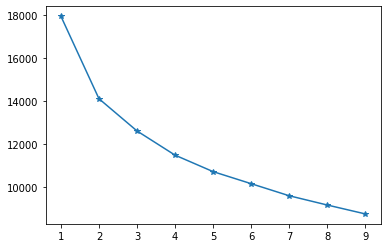

In [11]:
cl=[1,2,3,4,5,6,7,8,9]
wcsse=[]
for i in cl:
    clust_mod=KMeans(n_clusters=i,max_iter=1000,random_state=0)
    clust_mod.fit(data_sc)
    wcsse.append(clust_mod.inertia_)
plt.plot(cl,wcsse,marker='*')    

THE SILHOUETTE SCORE FOR DIFFERENT NUMBER OF CLUSTERS ARE [0.22177831430242748, 0.17637176925479175, 0.17777109047314382, 0.13952674314067653, 0.13530872035253236, 0.13235374138919823, 0.13230511745199725, 0.1317831213814239]


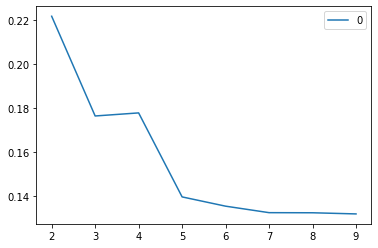

In [12]:
from sklearn.metrics import silhouette_score

cl=[2,3,4,5,6,7,8,9]
sil1=[]

for i in cl:
    clust_mod=KMeans(n_clusters=i,max_iter=1000,random_state=0)
    clust_mod.fit(data_sc)
    sil=silhouette_score(data_sc,clust_mod.labels_)
    sil1.append(sil)
    
    
print('THE SILHOUETTE SCORE FOR DIFFERENT NUMBER OF CLUSTERS ARE',sil1)

pd.DataFrame(sil1,index=cl).plot()

In [12]:
clust_mod=KMeans(n_clusters=2,max_iter=1000,random_state=0)
clust_mod.fit(data_sc)

clust_mod.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [13]:
one=mod1.copy()
one["tag_km"]=clust_mod.labels_

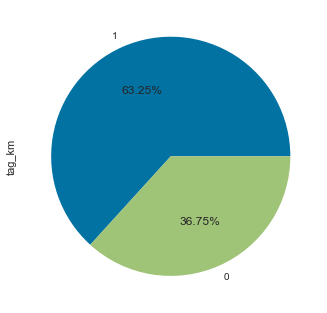

In [14]:
one["tag_km"].value_counts().plot(kind="pie",autopct="%.2f%%")

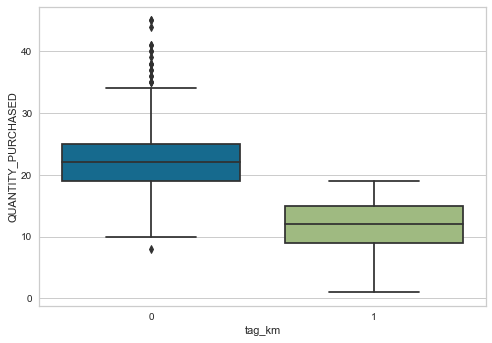

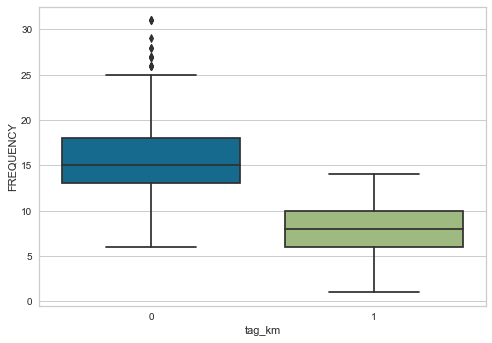

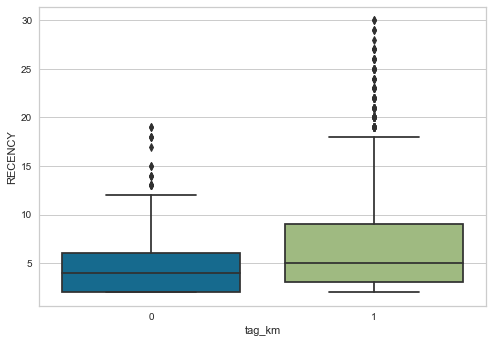

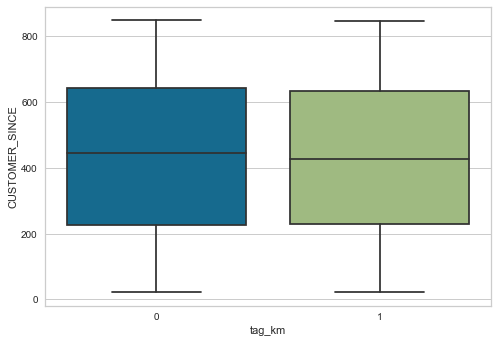

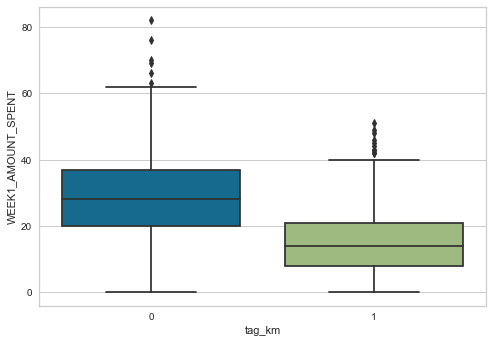

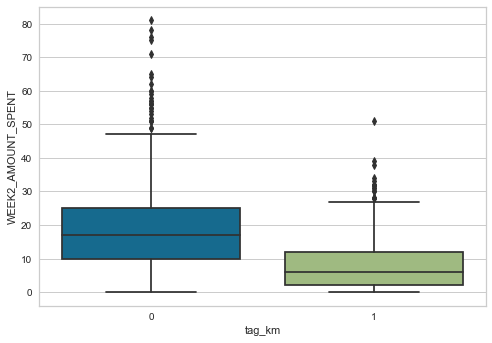

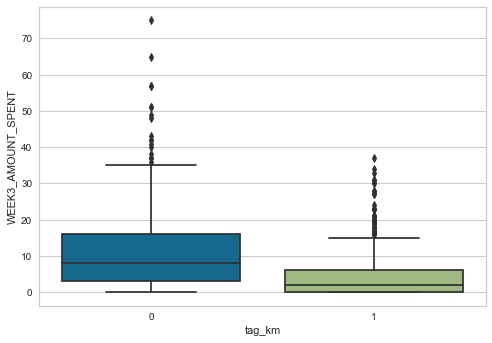

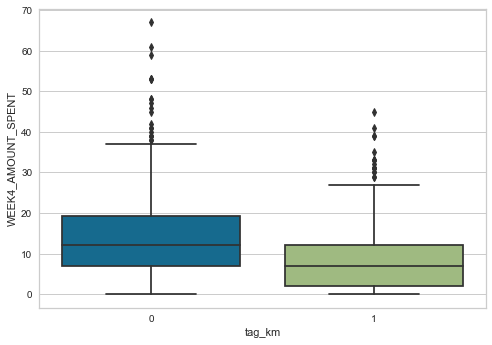

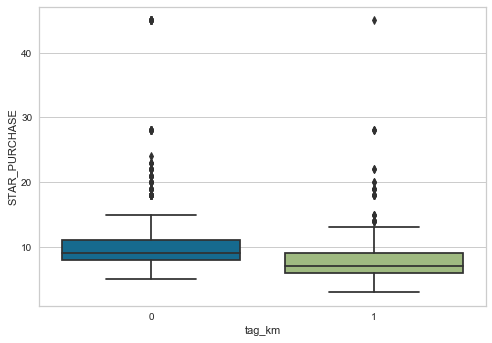

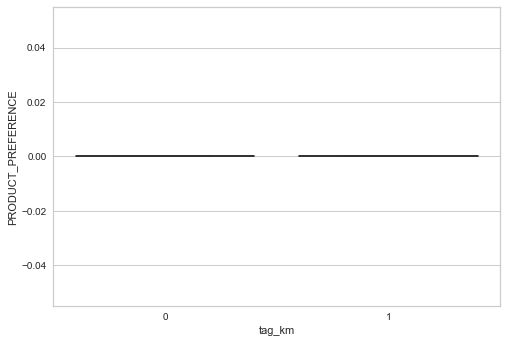

In [15]:
for i in one.drop("tag_km",axis=1).columns:
    sns.boxplot(x='tag_km',y=i,data=one)
    plt.show()

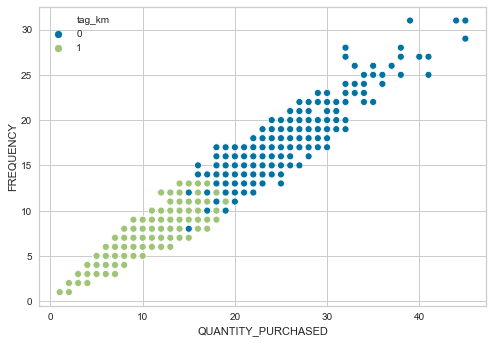

In [16]:
sns.scatterplot(x='QUANTITY_PURCHASED',y='FREQUENCY',hue='tag_km',data=one)
plt.show()

In [17]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster,cophenet

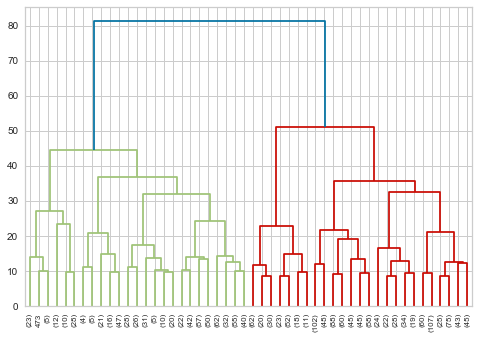

In [18]:
merge_ward=linkage(data_sc,method='ward')
dendrogram(merge_ward,truncate_mode='lastp',p=50)
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering


clust_agg=AgglomerativeClustering(n_clusters=2)
clust_agg.fit(data_sc)
one['tag_ag']=clust_agg.labels_

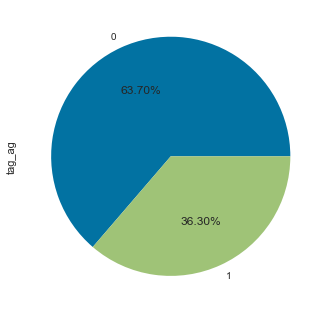

In [20]:
one["tag_ag"].value_counts().plot(kind="pie",autopct="%.2f%%")

In [21]:
pd.crosstab(one['tag_km'],one['tag_ag'])

tag_ag,0,1
tag_km,,
0,95,565
1,1049,87


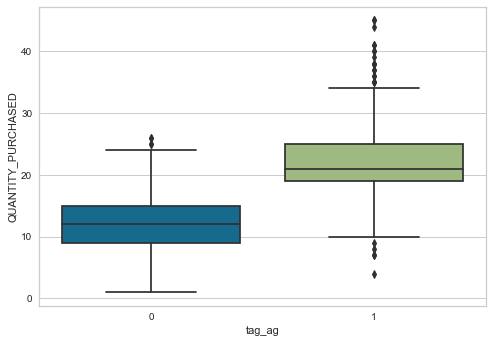

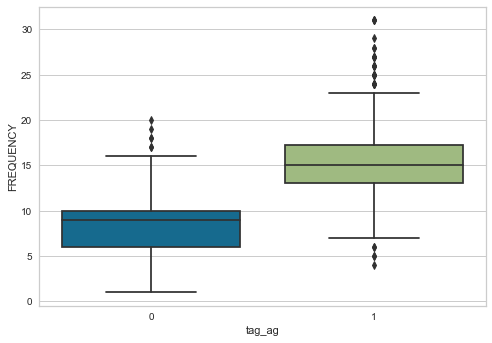

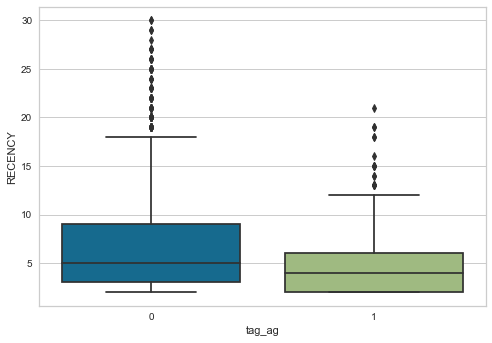

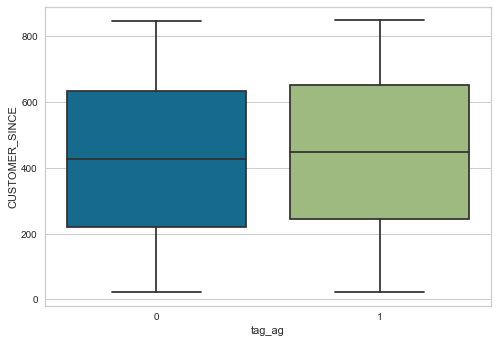

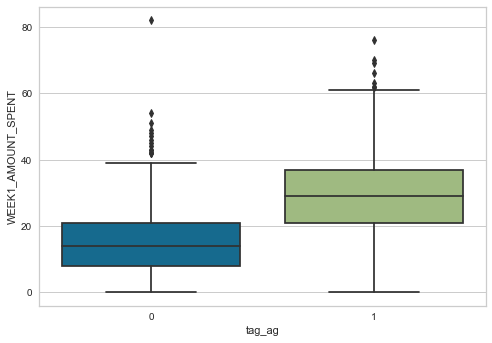

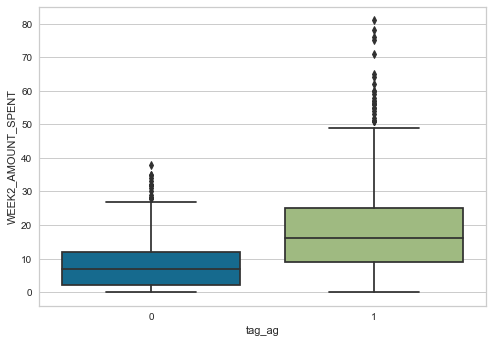

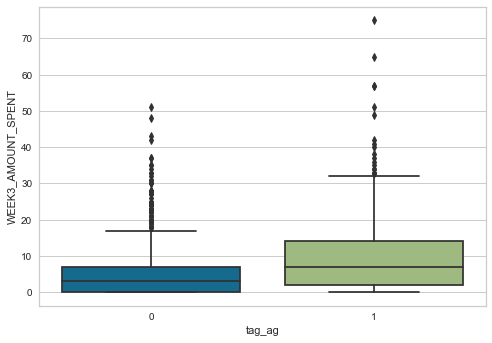

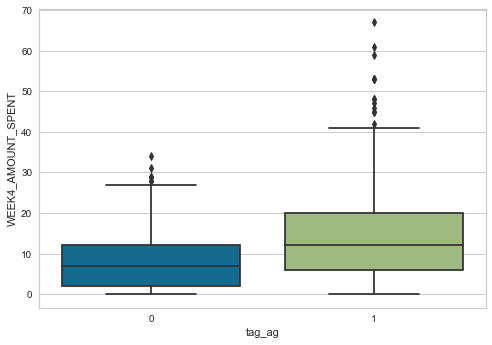

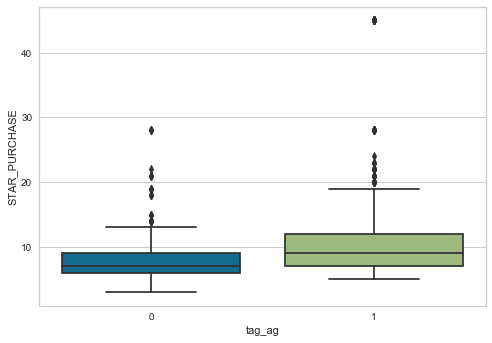

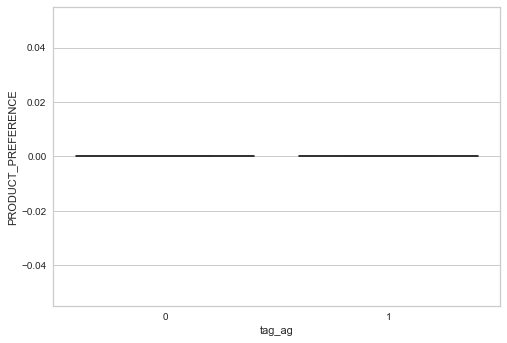

In [22]:
for i in one.drop(["tag_ag","tag_km"],axis=1).columns:
    sns.boxplot(x='tag_ag',y=i,data=one)
    plt.show()

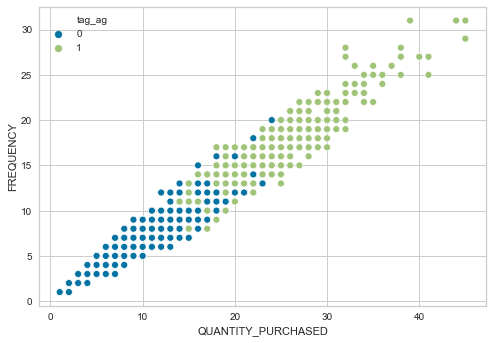

In [23]:
sns.scatterplot(x='QUANTITY_PURCHASED',y='FREQUENCY',hue='tag_ag',data=one)
plt.show()

In [24]:
# due to some reason droping tag_ag

In [25]:
one=one.drop("tag_ag",axis=1)

In [26]:
inp=one.drop('tag_km',axis=1)
out=one['tag_km']

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



cl1 = DecisionTreeClassifier(random_state = 0)
cl2 = RandomForestClassifier(random_state = 0)
cl3 = GaussianNB()
cl4 = GradientBoostingClassifier(random_state = 0)



kf = KFold(n_splits = 5,shuffle = True,random_state = 0)
for i,j in zip([cl1,cl2,cl3,cl4],['DT','RF','GNB','GB']):
    score = cross_val_score(i,inp,out,cv = kf,scoring = 'f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))

DT 0.9666880568516338 0.010829155120018391
RF 0.9797536571724027 0.0066053858311113
GNB 0.970159611678992 0.008779911228274309
GB 0.9790072162131844 0.007091161144858669


In [28]:
# random forest

from sklearn.metrics import accuracy_score,classification_report

xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size = 0.3,random_state = 0)
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

ypred = rf.predict(xtest)

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       198
           1       0.97      0.98      0.98       341

    accuracy                           0.97       539
   macro avg       0.97      0.96      0.97       539
weighted avg       0.97      0.97      0.97       539



In [30]:
dt = pd.DataFrame()
dt['Features'] = xtrain.columns
dt['Feature_importance'] = rf.feature_importances_

dt.sort_values('Feature_importance',ascending = False)

,Features,Feature_importance
0,QUANTITY_PURCHASED,0.391760
1,FREQUENCY,0.284833
5,WEEK2_AMOUNT_SPENT,0.084751
4,WEEK1_AMOUNT_SPENT,0.078743
8,STAR_PURCHASE,0.060508
6,WEEK3_AMOUNT_SPENT,0.036446
7,WEEK4_AMOUNT_SPENT,0.030342
3,CUSTOMER_SINCE,0.016730
2,RECENCY,0.015886
9,PRODUCT_PREFERENCE,0.000000


In [31]:
# now its good to give mod2 the model
y_unknown=rf.predict(mod2)
mod2["tag_km"]=y_unknown
mod2.head()

C:\Users\PAARI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE,tag_km
customer_id,,,,,,,,,,,
8353,29,20,3,800,57,22,0,25,20,0,0
108,14,9,2,552,16,7,10,8,8,0,1
610,36,21,10,209,61,23,15,0,7,0,0
5352,20,14,2,92,20,15,4,13,6,0,0
125,17,11,10,505,26,16,4,0,7,0,1


In [32]:
# complete segmented file:
one.head()

,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE,tag_km
customer_id,,,,,,,,,,,
564,16,14,3,304,28,3,14,3,7,0,1
5188,3,2,20,574,7,3,0,0,7,0,1
702,14,11,2,833,20,0,9,14,8,0,1
5414,24,15,3,326,23,16,0,41,12,0,0
8117,20,15,5,678,29,10,0,19,8,0,0


In [33]:
mod2.head()

,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE,tag_km
customer_id,,,,,,,,,,,
8353,29,20,3,800,57,22,0,25,20,0,0
108,14,9,2,552,16,7,10,8,8,0,1
610,36,21,10,209,61,23,15,0,7,0,0
5352,20,14,2,92,20,15,4,13,6,0,0
125,17,11,10,505,26,16,4,0,7,0,1


In [34]:
segmented=pd.concat([one,mod2],axis=0).sort_index()
segmented.head()

,QUANTITY_PURCHASED,FREQUENCY,RECENCY,CUSTOMER_SINCE,WEEK1_AMOUNT_SPENT,WEEK2_AMOUNT_SPENT,WEEK3_AMOUNT_SPENT,WEEK4_AMOUNT_SPENT,STAR_PURCHASE,PRODUCT_PREFERENCE,tag_km
customer_id,,,,,,,,,,,
1,11,8,2,847,6,0,8,15,6,0,1
2,27,21,5,844,42,3,17,28,12,0,0
3,45,31,7,841,37,71,75,4,23,0,0
4,10,9,5,838,14,4,4,4,6,0,1
5,8,6,2,836,8,7,0,8,7,0,1


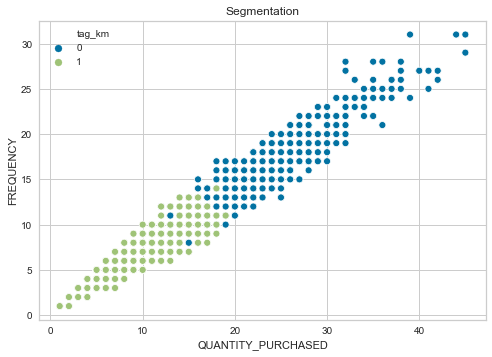

In [35]:
# final cluster check
plt.title('Segmentation')
sns.scatterplot(x='QUANTITY_PURCHASED',y='FREQUENCY',hue='tag_km',data=segmented)
plt.show()